In [2]:
# Importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
mobile = pd.read_csv("mobilePricePred.csv")

In [4]:
mobile

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


# Data Cleaning

In [5]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


### Figuring out number of null values in each column

In [6]:
mobile.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

** Hence, there are no missing values in the dataset. **

In [7]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Target Variable :

In [8]:
mobile.price_range.unique()

array([1, 2, 3, 0])

### Hence, there are 4 price ranges.
```
0 - low cost
1 - medium cost
2 - high cost
3 - very high cost
```

# Data visualization

## Checking the balance between the classes of the target variable

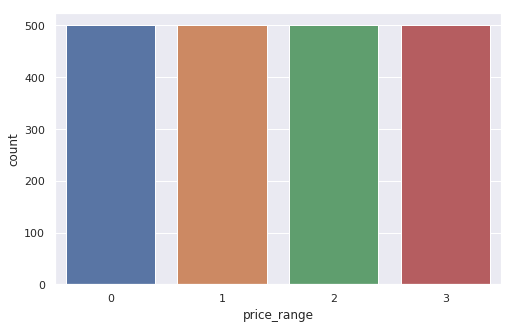

In [9]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(mobile.price_range)
plt.show()

### Data is split equally among all classes i.e. price_range.

# Bluetooth
```
0 - no bluetooth
1 - has bluetooth
```

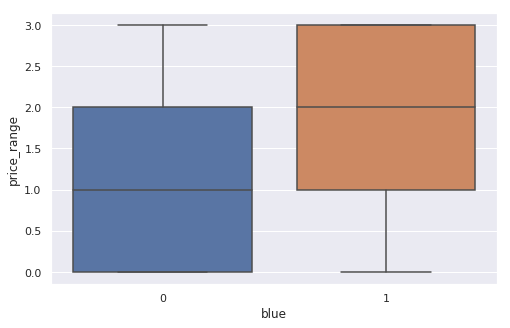

In [10]:
sns.boxplot(mobile.blue, mobile.price_range)

### Bluetooth affects the price range. Bluetooth enabled mobiles are priced higher.

# Dual Sim
```
0 - not dual sim
1 - dual sim
```

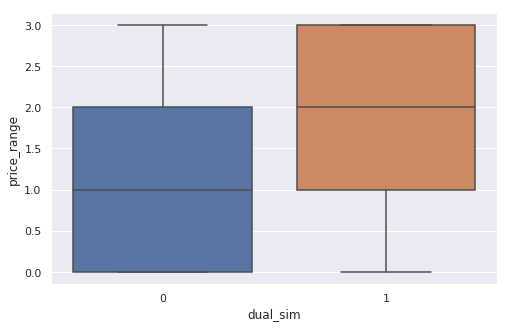

In [11]:
sns.boxplot(mobile.dual_sim, mobile.price_range)

### Price range of dual sim mobile phones are considerably higher.

# 4G
```
0 - 4 G not supported
1 - 4 G supported
```

In [12]:
mobile.groupby(['four_g']).price_range.value_counts().sort_index()

four_g  price_range
0       0              241
        1              238
        2              253
        3              225
1       0              259
        1              262
        2              247
        3              275
Name: price_range, dtype: int64

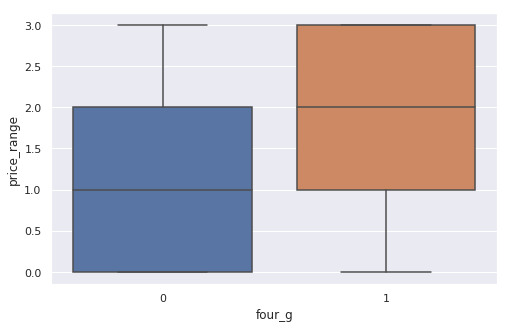

In [13]:
sns.boxplot(mobile.four_g, mobile.price_range)

### Price range of 4G phones is considerably higher.

# 3G
```
0 - 3 G not supported
1 - 3G supported
```

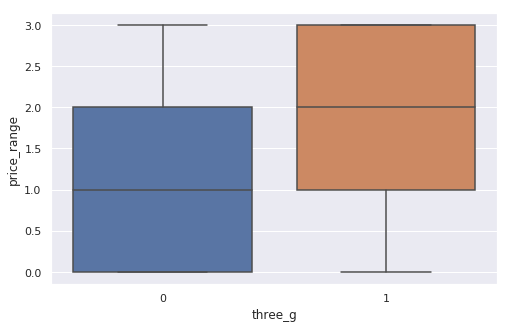

In [14]:
sns.boxplot(mobile.three_g, mobile.price_range)

### 3G supported mobiles are priced higher.

# Touch Screen
```
0 - no
1 - yes
```

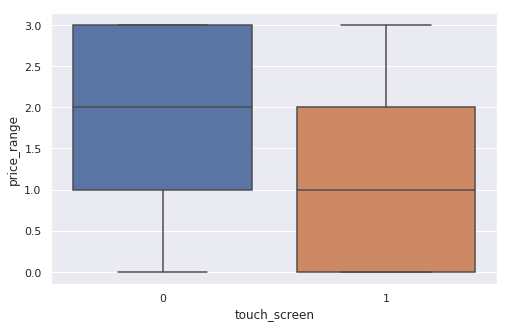

In [15]:
sns.boxplot(mobile.touch_screen, mobile.price_range)

In [16]:
mobile.groupby(['touch_screen']).price_range.value_counts().sort_index()

touch_screen  price_range
0             0              238
              1              239
              2              265
              3              252
1             0              262
              1              261
              2              235
              3              248
Name: price_range, dtype: int64

### Mobiles without touch screen are priced higher than those with touch screens.

# Wifi
```
0 - no
1 - yes
```

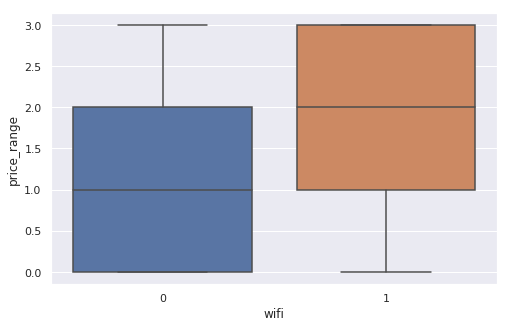

In [17]:
sns.boxplot(mobile.wifi, mobile.price_range)

### Wifi enabled mobiles are priced high.

# Internal Memory (in GB)

In [18]:
mobile.groupby(['int_memory']).price_range.value_counts().sort_index().unstack()

price_range,0,1,2,3
int_memory,,,,
2,11,10,16,5
3,8,7,6,4
4,7,6,5,2
5,9,10,7,10
6,9,6,12,10
7,9,14,10,7
8,12,7,12,6
9,5,7,10,13
10,8,8,12,8


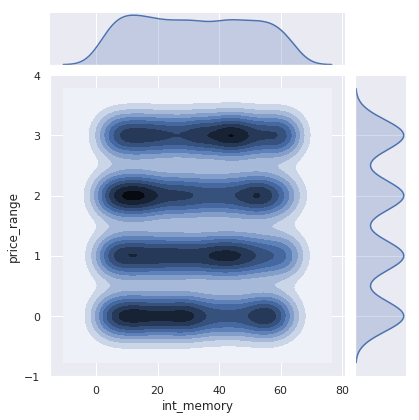

In [19]:
sns.jointplot(x='int_memory', y='price_range', data=mobile, kind='kde')

# RAM ( in MB )

In [20]:
mobile.groupby(['ram']).price_range.value_counts().sort_index().unstack()

price_range,0,1,2,3
ram,,,,
256,1.0,NaN,NaN,NaN
258,2.0,NaN,NaN,NaN
259,1.0,NaN,NaN,NaN
262,1.0,NaN,NaN,NaN
263,1.0,NaN,NaN,NaN
265,1.0,NaN,NaN,NaN
267,1.0,NaN,NaN,NaN
273,1.0,NaN,NaN,NaN
277,1.0,NaN,NaN,NaN


In [21]:
pd.crosstab(mobile.ram, mobile.price_range, normalize='index')

price_range,0,1,2,3
ram,,,,
256,1.0,0.0,0.0,0.0
258,1.0,0.0,0.0,0.0
259,1.0,0.0,0.0,0.0
262,1.0,0.0,0.0,0.0
263,1.0,0.0,0.0,0.0
265,1.0,0.0,0.0,0.0
267,1.0,0.0,0.0,0.0
273,1.0,0.0,0.0,0.0
277,1.0,0.0,0.0,0.0


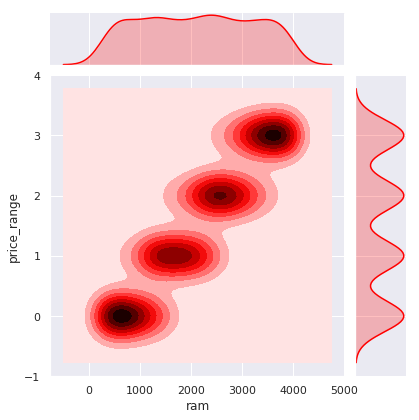

In [22]:
sns.jointplot(x='ram', y='price_range', data=mobile, color='red', kind='kde')

### RAM is a significant factor in determining the price range.

# Battery Power
```
Total energy a battery can store in one time measured in mAh
```

In [23]:
mobile.groupby(['battery_power']).price_range.value_counts().sort_index().unstack()

price_range,0,1,2,3
battery_power,,,,
501,NaN,1.0,1.0,NaN
502,NaN,1.0,1.0,NaN
503,1.0,1.0,NaN,1.0
504,3.0,1.0,1.0,NaN
506,NaN,NaN,1.0,NaN
507,NaN,2.0,NaN,NaN
508,1.0,1.0,1.0,NaN
509,1.0,NaN,NaN,NaN
510,NaN,2.0,NaN,1.0


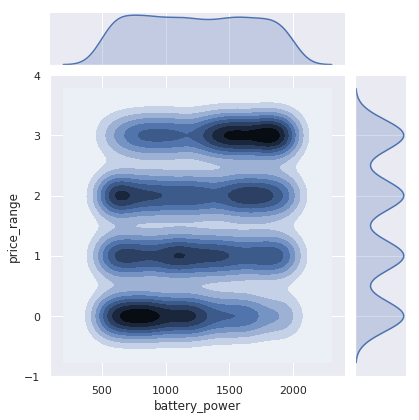

In [24]:
sns.jointplot(x='battery_power', y='price_range', data=mobile, kind='kde')

### Battery power affects the price range to some extent. 
- Very few high battery powered mobiles are available at lower price.
- But, there are low battery powered mobiles that are priced high.

# Clock Speed 
```
Speed at which microprocessor executes instructions
```

In [25]:
mobile.groupby(['clock_speed']).price_range.value_counts().sort_index().unstack()

price_range,0,1,2,3
clock_speed,,,,
0.5,109,105,96,103
0.6,20,22,16,16
0.7,15,17,19,13
0.8,12,16,18,12
0.9,18,13,13,14
1.0,14,22,12,13
1.1,12,10,13,16
1.2,12,15,18,11
1.3,8,20,16,24


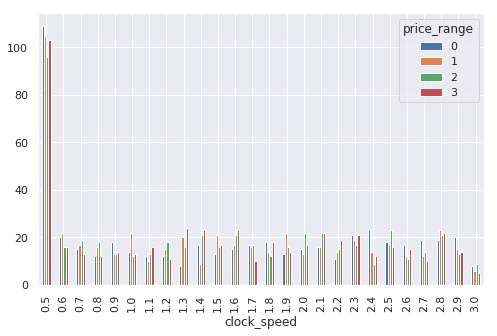

In [26]:
mobile.groupby(['clock_speed']).price_range.value_counts().sort_index().unstack().plot(kind='bar')

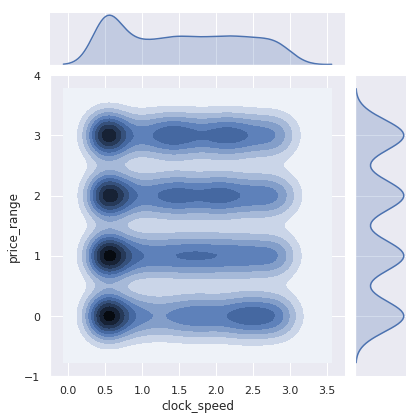

In [27]:
sns.jointplot(x='clock_speed', y='price_range', data=mobile, kind='kde')

### 1. Clock speed does not seem to affect the price range much. 
### 2. Out of the mobiles taken under consideration, a large number have lowest clock speeds, whereas very few have the highest clock speed. 

# Number of cores

In [28]:
mobile.groupby(['n_cores']).price_range.value_counts().sort_index().unstack()

price_range,0,1,2,3
n_cores,,,,
1,49,76,52,65
2,69,59,57,62
3,62,69,56,59
4,67,76,73,58
5,59,51,66,70
6,61,54,57,58
7,66,55,69,69
8,67,60,70,59


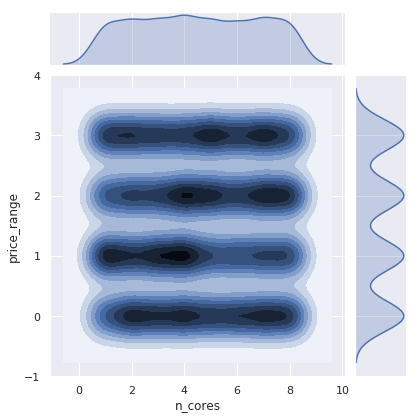

In [29]:
sns.jointplot(x='n_cores', y='price_range', data=mobile, kind='kde')

### Number of cores does not seem to affect the price range much. Mobiles with 8 cores are available at lower price ranges as well.

# Screen size

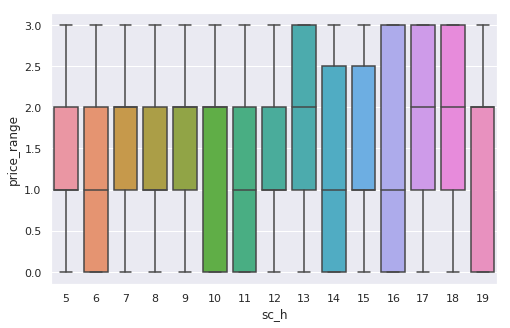

In [30]:
sns.boxplot(mobile.sc_h, mobile.price_range)

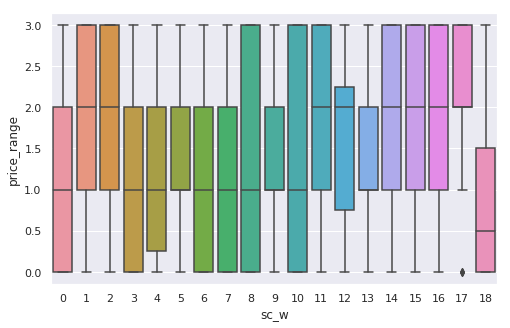

In [31]:
sns.boxplot(mobile.sc_w, mobile.price_range)

### Some screen sizes are priced higher.

# Pixel Resolution

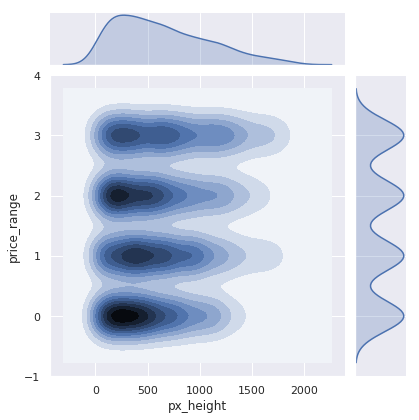

In [32]:
sns.jointplot(x='px_height', y='price_range', data=mobile, kind='kde')

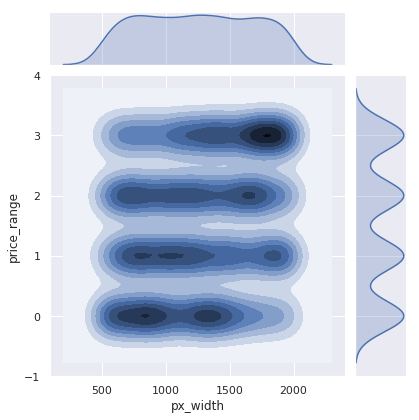

In [33]:
sns.jointplot(x='px_width', y='price_range', data=mobile, kind='kde')

### More number of high pixel resolution mobiles are available for higher price.

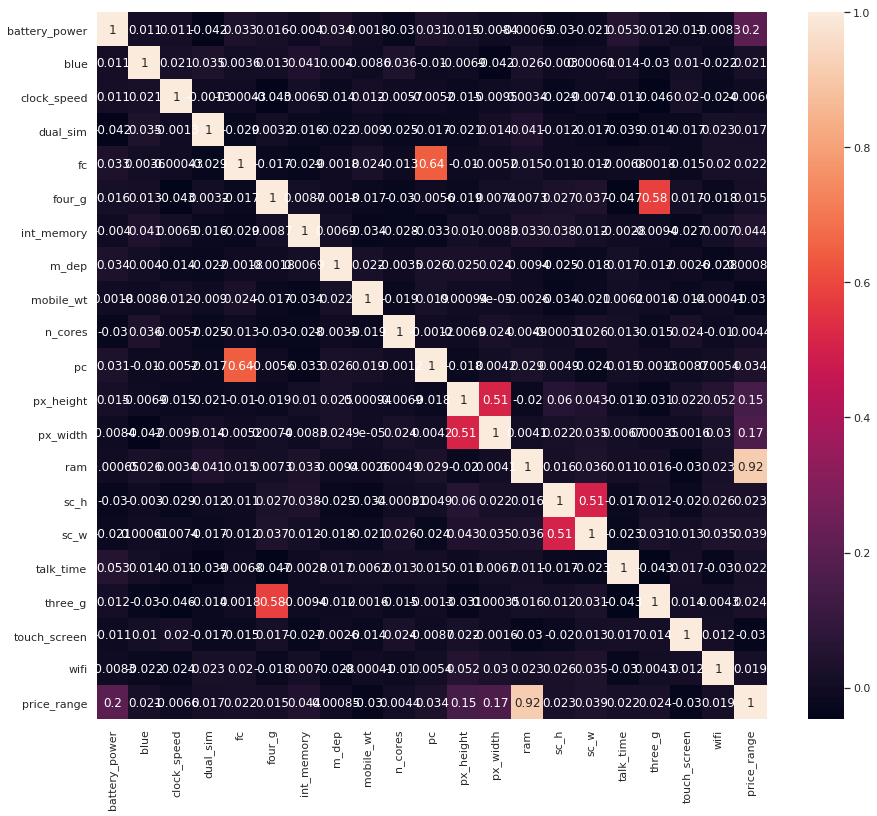

In [11]:
sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(mobile.corr(),annot=True)